<div class="alert alert-danger">

<h1>Take notice!🎥</h1>
<ul>
    <li>This class will be recorded</li>
</ul>
    
</div>

# Open Street Map

In this lab, you will learn how to:
* use various python libraries to search for and download Open Street Map *building* data
* categorize buildings by type
* visualize buildings on a map
* create a function to produce building maps
* create a loop to produce building maps for multiple locations

Note that we will learn how to use street network analysis with OSMnx in subsequent labs.

![osm](images/OSM.png)
What is open street map?
- https://www.openstreetmap.org/

OSMnx
- library documentation (https://osmnx.readthedocs.io)
- github (https://github.com/gboeing/osmnx)
- Examples and demos are available at: https://github.com/gboeing/osmnx-examples


## Download visualizing Open Street Map data

OSMnx lets you download data from Open Street Map.

You can download OSM data by providing OSMnx any of the following:
  - a bounding box
  - a lat-long point plus a distance
  - an address plus a distance
  - a place name or list of place names (to automatically geocode and get the boundary of)
  - a polygon of the desired street network's boundaries
  - a .osm formatted xml file

[OSMNx source](https://github.com/gboeing/osmnx/blob/99f4b1566a22f2a4dd3763190f8d0f3efa2a9b7f/osmnx/geometries.py)

<div class="alert alert-info">
    
`osmnx` uses nominatim to geocode and find places. Make sure that the geography you search for is searchable here first:

https://nominatim.openstreetmap.org/ui/search.html

</div>

For the sake of clarity, and effective use of a workshop setting, let's use the "address plus a distance" method to download a street network dataset.

## Import the libraries

In [1]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# for interactive plots
import plotly.express as px

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

## Define an area of interest

<div class="alert alert-info">

Search for a different city in the world other than Downtown Los Angeles. It can be where you're from, where you're living, or a place you want to travel to.
</div>

In [2]:
address = 'Downtown, Los Angeles, CA'
# copy and paste name on the blurb when you look for other citeis

In [3]:
%%time
# %%time is a magic command to see how long it takes this cell to run 

# get the data from OSM that are tagged as 'building' for a 1000m X 1000m square area
osm = ox.features.features_from_address(address,tags={'building':True},dist=1000)
# if it is very slow, you should reduce the number of "dist" and smallen the size of the area

CPU times: user 432 ms, sys: 34.6 ms, total: 467 ms
Wall time: 4.47 s


<div class="alert alert-danger">
    
<h2>Be careful!</h2>

Buildings are the "heaviest" data types to download, as they often encompass thousands of polygons. While you are technically capable of downloading buildings for entire neighborhoods and cities, doing so can easily overwhelm your notebook. Start small, and scale up!
</div>

In [4]:
# how many rows and columns?
osm.shape

(1364, 136)

In [5]:
# what is the datatype?
type(osm)

geopandas.geodataframe.GeoDataFrame

In [6]:
# show me 10 random rows
osm.sample(10)

addr:state     building    ele gnis:county_name  \
element_type osmid                                                       
way          428017480        NaN          yes  131.8              NaN   
             427942828         CA   commercial   90.5              NaN   
             428128148        NaN   industrial   88.3              NaN   
             428153737        NaN       retail   83.8              NaN   
             426405589        NaN   commercial  112.5              NaN   
             428017955         CA          yes  104.2              NaN   
             427939411        NaN  residential   94.7              NaN   
             428021791         CA       retail  111.0              NaN   
             904226186        NaN       retail    NaN              NaN   
             428024390        NaN   apartments  123.4              NaN   

                       gnis:feature_id gnis:import_uuid gnis:reviewed  \
element_type osmid                                                      
way          428017480             NaN              NaN           NaN   
             427942828             NaN              NaN           NaN   
             428128148             NaN              NaN           NaN   
             428153737             NaN              NaN           NaN   
             426405589             NaN              NaN           NaN   
             428017955             NaN              NaN           NaN   
             427939411             NaN              NaN           NaN   
             428021791             NaN              NaN           NaN   
             904226186             NaN              NaN           NaN   
             428024390             NaN              NaN           NaN   

                                                name source wikidata  ...  \
element_type osmid                                                    ...   
way          428017480                           NaN    NaN      NaN  ...   
             427942828                           NaN    NaN      NaN  ...   
             428128148                           NaN    NaN      NaN  ...   
             428153737                           NaN    NaN      NaN  ...   
             426405589                           NaN    NaN      NaN  ...   
             428017955       Downtown Palace Theatre    NaN      NaN  ...   
             427939411                           NaN    NaN      NaN  ...   
             428021791                    The Mandel    NaN      NaN  ...   
             904226186  Laughlin Annex/Lyon Building    NaN      NaN  ...   
             428024390   The Metropolitan Apartments    NaN      NaN  ...   

                       comment architect elevator indoor cooling:method ways  \
element_type osmid                                                             
way          428017480     NaN       NaN      NaN    NaN            NaN  NaN   
             427942828     NaN       NaN      NaN    NaN            NaN  NaN   
             428128148     NaN       NaN      NaN    NaN            NaN  NaN   
             428153737     NaN       NaN      NaN    NaN            NaN  NaN   
             426405589     NaN       NaN      NaN    NaN            NaN  NaN   
             428017955     NaN       NaN      NaN    NaN            NaN  NaN   
             427939411     NaN       NaN      NaN    NaN            NaN  NaN   
             428021791     NaN       NaN      NaN    NaN            NaN  NaN   
             904226186     NaN       NaN      NaN    NaN            NaN  NaN   
             428024390     NaN       NaN      NaN    NaN            NaN  NaN   

                       type  url capacity theatre:genre  
element_type osmid                                       
way          428017480  NaN  NaN      NaN           NaN  
             427942828  NaN  NaN      NaN           NaN  
             428128148  NaN  NaN      NaN           NaN  
             428153737  NaN  NaN      NaN           NaN  
             426405589 

## Eliminate unnecessary columns
The dataframe has 100+ columns. Let's explore what these are, and which ones are necessary for our use.

What are the datatypes and count of null values?

In [7]:
# look at the datatypes, columns, and null values
osm.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 1364 entries, ('node', 368172745) to ('relation', 12304820)
Data columns (total 136 columns):
 #    Column                       Non-Null Count  Dtype   
---   ------                       --------------  -----   
 0    addr:state                   255 non-null    object  
 1    building                     1364 non-null   object  
 2    ele                          1214 non-null   object  
 3    gnis:county_name             19 non-null     object  
 4    gnis:feature_id              26 non-null     object  
 5    gnis:import_uuid             21 non-null     object  
 6    gnis:reviewed                10 non-null     object  
 7    name                         397 non-null    object  
 8    source                       49 non-null     object  
 9    wikidata                     72 non-null     object  
 10   geometry                     1364 non-null   geometry
 11   wheelchair                   9 non-null      object  
 12   ac

Really, what we need is just...

In [8]:
## subset it
columns_to_keep = ['geometry','building','height']
osm = osm[columns_to_keep]
osm.head(10)

geometry  \
element_type osmid                                                           
node         368172745                         POINT (-118.25146 34.04557)   
             368173227                         POINT (-118.26257 34.04390)   
             8424018619                        POINT (-118.26140 34.04549)   
             9986845079                        POINT (-118.25513 34.04655)   
way          23973401    POLYGON ((-118.25465 34.05117, -118.25466 34.0...   
             27475188    POLYGON ((-118.25140 34.05328, -118.25205 34.0...   
             27475230    POLYGON ((-118.25142 34.05196, -118.25140 34.0...   
             33528271    POLYGON ((-118.25593 34.05332, -118.25654 34.0...   
             39335032    POLYGON ((-118.24565 34.05479, -118.24516 34.0...   
             48847807    POLYGON ((-118.25201 34.05151, -118.25196 34.0...   

                           building height  
element_type osmid                          
node         368172745          yes    NaN  
             368173227          yes    NaN  
             8424018619         yes    NaN  
             9986845079         yes    NaN  
way          23973401         tower  309.9  
             27475188    apartments    NaN  
             27475230           yes  176.0  
             33528271         hotel    NaN  
             39335032           yes   12.8  
             48847807           yes  228.5

### Cleaning up unspecified building types

Wait, what is the "yes" building type? According to OSM's wiki page, this is a building of "[unspecific type](https://wiki.openstreetmap.org/wiki/Tag:building%3Dyes)", used when someone is unable or unwilling to tag it more specifically.

With this in mind, let's change "yes" to "unspecified". To do so, we will use the `.loc` function as documented [here](https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/)

In [10]:
# locate cells in column building where value is yes
osm.loc[osm['building']=='yes','building'] = 'unspecified'
osm.sample(10)

geometry  \
element_type osmid                                                          
way          202905185  POLYGON ((-118.24272 34.04977, -118.24253 34.0...   
             427942909  POLYGON ((-118.25225 34.04715, -118.25195 34.0...   
             427942816  POLYGON ((-118.24834 34.05043, -118.24824 34.0...   
             428021883  POLYGON ((-118.25645 34.04841, -118.25689 34.0...   
             423024468  POLYGON ((-118.24543 34.04762, -118.24545 34.0...   
             497289317  POLYGON ((-118.26020 34.05128, -118.25972 34.0...   
             425993512  POLYGON ((-118.24830 34.05683, -118.24832 34.0...   
             428017458  POLYGON ((-118.24880 34.04541, -118.24880 34.0...   
relation     6367810    POLYGON ((-118.26217 34.04116, -118.26193 34.0...   
way          427817499  POLYGON ((-118.24308 34.04863, -118.24309 34.0...   

                           building height  
element_type osmid                          
way          202905185  residential    NaN  
             427942909       retail   20.2  
             427942816       retail    7.8  
             428021883   commercial   33.0  
             423024468       retail    6.4  
             497289317        tower   89.6  
             425993512  unspecified   43.9  
             428017458   commercial   40.6  
relation     6367810     apartments   31.9  
way          427817499   apartments   21.6

# Make a building type chart

Let's create a dataframe for building types. We can do this with a nifty series of chained code functions in a single line.

In [11]:
# get the counts of buildings by building type
osm_building_counts = osm.value_counts(['building']).reset_index(name="count")
osm_building_counts

building  count
0      unspecified    276
1       commercial    272
2           retail    240
3       industrial    150
4       apartments    132
5        warehouse     93
6            hotel     43
7      residential     33
8          factory     31
9             roof     28
10           house     17
11         parking     16
12          office      9
13          garage      3
14          school      3
15          vacant      2
16  transportation      2
17           tower      2
18    construction      2
19         service      1
20           civic      1
21      university      1
22          public      1
23          bridge      1
24        detached      1
25      greenhouse      1
26      grandstand      1
27      government      1
28    kindergarten      1

## Create a bar chart

To start, the simplest method to create a bar plot in python is to simply add `plot.bar` to the dataframe.

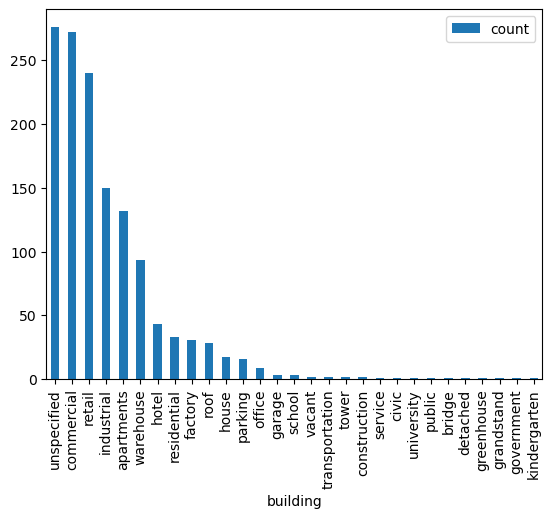

In [12]:
# create bar chart with osm buildings where x axis is building count
osm_building_counts.plot.bar(x='building');

Now output it again, but this time, only show the "Top 10."

Take the extra mile to make it pretty!

building  count
1       commercial    272
2           retail    240
3       industrial    150
4       apartments    132
5        warehouse     93
6            hotel     43
7      residential     33
8          factory     31
9             roof     28
10           house     17
11         parking     16
12          office      9
13          garage      3
14          school      3
15          vacant      2
16  transportation      2
17           tower      2
18    construction      2
19         service      1
20           civic      1
21      university      1
22          public      1
23          bridge      1
24        detached      1
25      greenhouse      1
26      grandstand      1
27      government      1
28    kindergarten      1

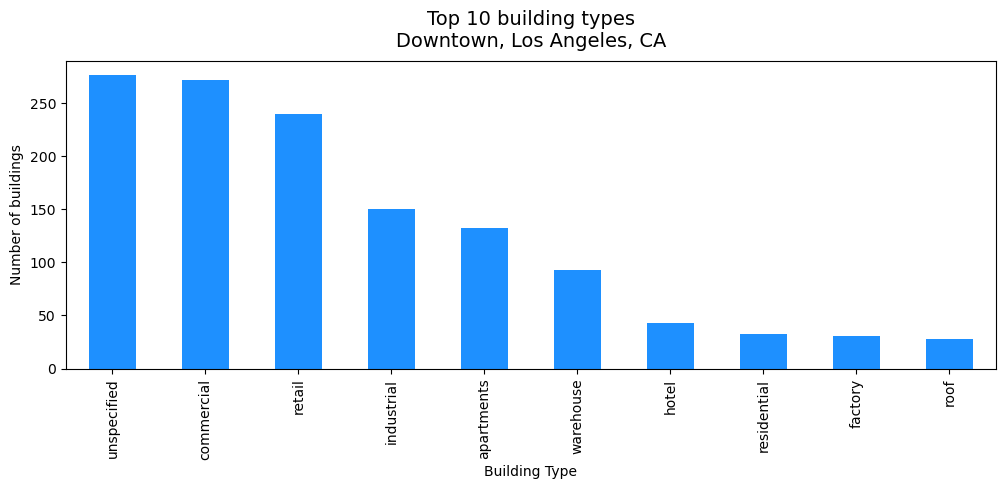

In [14]:
# create matplotlib bar chart with detailed title and x and y axis labels

# create empty figure and axex where dataframe will be plotted
fig, ax = plt.subplots(figsize=(12,4))

# plot top ten building types with counts 
# this is for showing top 10, so put that number here
osm_building_counts[:10].plot.bar(ax=ax,
                                      x='building',
                                      y='count',
                                      legend=False,
                                      color='dodgerblue'
                                      )

ax.set_xlabel('Building Type') # override x label
ax.set_ylabel('Number of buildings') # override y label
ax.set_title("Top 10 building types\n"+address,fontsize=14,pad=10); # multi-line title with padding

In [16]:
# how to drop the rows of "unspecified"?
osm_building_counts = osm_building_counts.drop(osm_building_counts[osm_building_counts['building'] == 'unspecified'].index)
osm_building_counts

building  count
1       commercial    272
2           retail    240
3       industrial    150
4       apartments    132
5        warehouse     93
6            hotel     43
7      residential     33
8          factory     31
9             roof     28
10           house     17
11         parking     16
12          office      9
13          garage      3
14          school      3
15          vacant      2
16  transportation      2
17           tower      2
18    construction      2
19         service      1
20           civic      1
21      university      1
22          public      1
23          bridge      1
24        detached      1
25      greenhouse      1
26      grandstand      1
27      government      1
28    kindergarten      1

In [15]:
# how to drop the rows with null value
osm_building_counts = osm_building_counts.dropna(subset=['building'])

### Going the extra "extra" mile

The chart that was just created uses Matplotlib, which has long been a standard in Python libraries. 

Here we introduce [plotly](https://plotly.com/python/bar-charts/) as the charting library, which comes with preconfigured thematic "[templates](https://plotly.com/python/templates/)" that allow us to generate various charts with differing design principles.

In the code cell below, you can replace "plotly_white" with any of the following values to experiment with different designs for your charts.

Choose from:
- `ggplot2`
- `seaborn`
- `simple_white`
- `plotly`,
- `plotly_white`
- `plotly_dark`
- `presentation`
- `xgridoff`,
- `ygridoff`
- `gridon`
- `none`

In [17]:
# import the themes
import plotly.io as pio

# import the themes
import plotly.io as pio

# list the templates available
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [18]:
# set default template to plotly_white
pio.templates.default = "plotly_white"

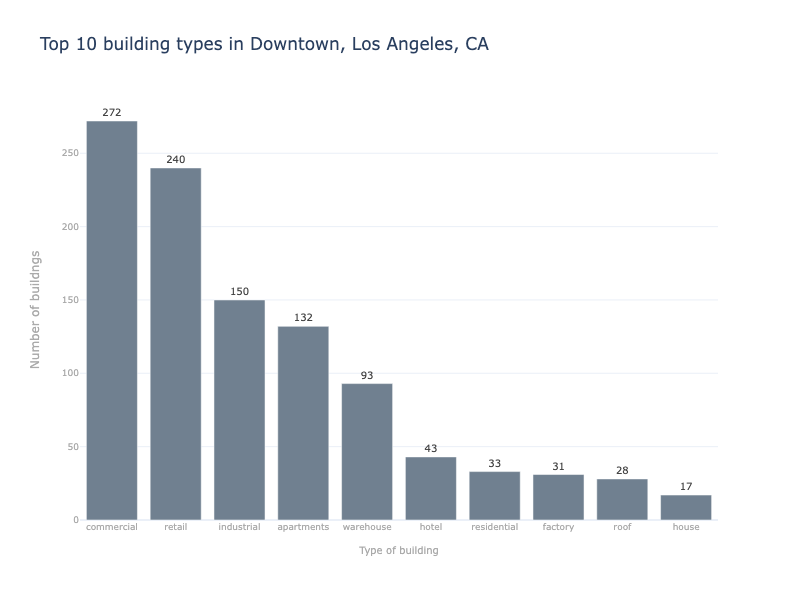

In [19]:
# bar chart (for top 10 counts)
fig = px.bar(osm_building_counts.head(10), # .head(10) is for picking top 10
        x='building',
        y='count',
        title="Top 10 building types in "+address, # title
        text_auto = True,
        height=600,
        width=900,
        color_discrete_sequence =['slategray']*len(osm_building_counts), # single color for all the bars
        labels={
                'count': 'Number of buildngs',
                'building': 'Type of building',
        })

# bar label
fig.update_traces(textposition='outside',textfont_size=10,textfont_color='#444') 
# you can check the color from the website of AdobeColor and put this number

# axes labels
fig.update_yaxes(title_font_size=12,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)
fig.update_xaxes(title_font_size=10,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)

# show the figure
fig.show()
fig.write_html('top 10 building types Los Angeles.html')

# you can save the image as png by pressing the camera icon right above the figure.

<div class="alert alert-info">

Now it's your turn! With your area of interest, anywhere in the world, create a bar plot of building types.
    
Take a screengrab or save the resulting image using ```plt.savefig('city-name.png')```, and paste it into this <a href="https://docs.google.com/document/d/1cySh-_fXGkniGJXrztM-ZNtDETmTYunWp4ZbMCOEJ2s/edit?usp=sharing" target="_blank">Google Document</a>.
</div>

# Geopandas Map Plots

Let's return to the original OSM data we downloaded. Remember that the OSMnx `geometries_from_address` command returned a geodataframe of buildings. Let's plot them:

<Axes: >

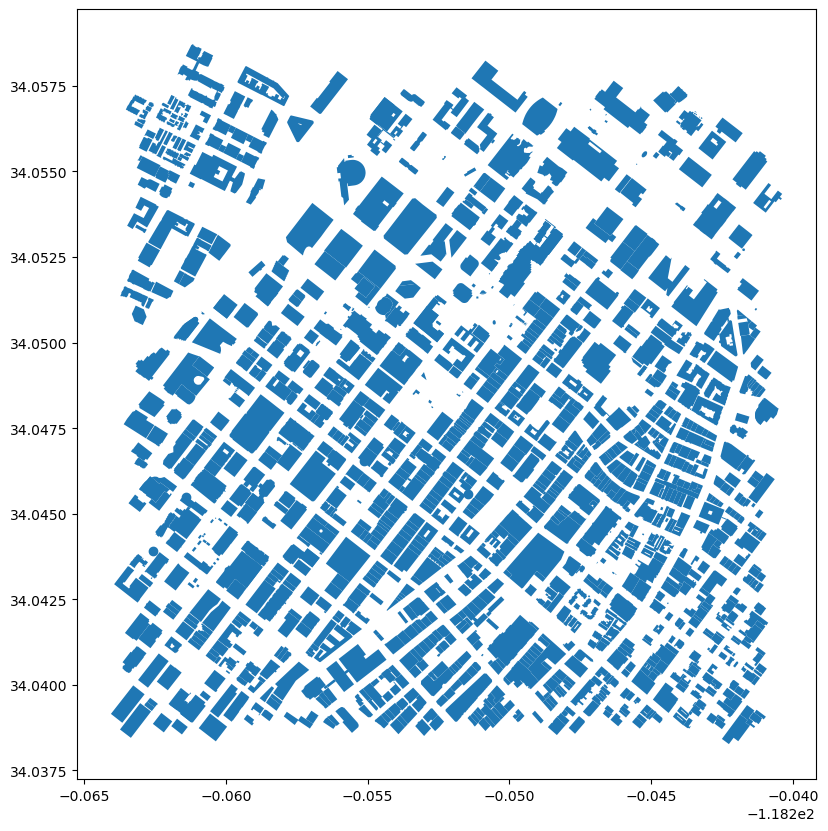

In [20]:
# plot entire dataset
osm.plot(figsize=(10,10))

In [ ]:
# plot a single random building
osm.sample(1).plot()

## Color coding buildings
Use the `column` argument to assign a column in the dataframe to color the polygons. If the column is numerical, it will poduce a numerically sequential map. If the column is categorical, it will produce a categorically colored map (a different color assigned to each distinct category).

You can use the `cmap` argument to assign a color palette. Find all the available options for `cmap` here:
- https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

<Axes: >

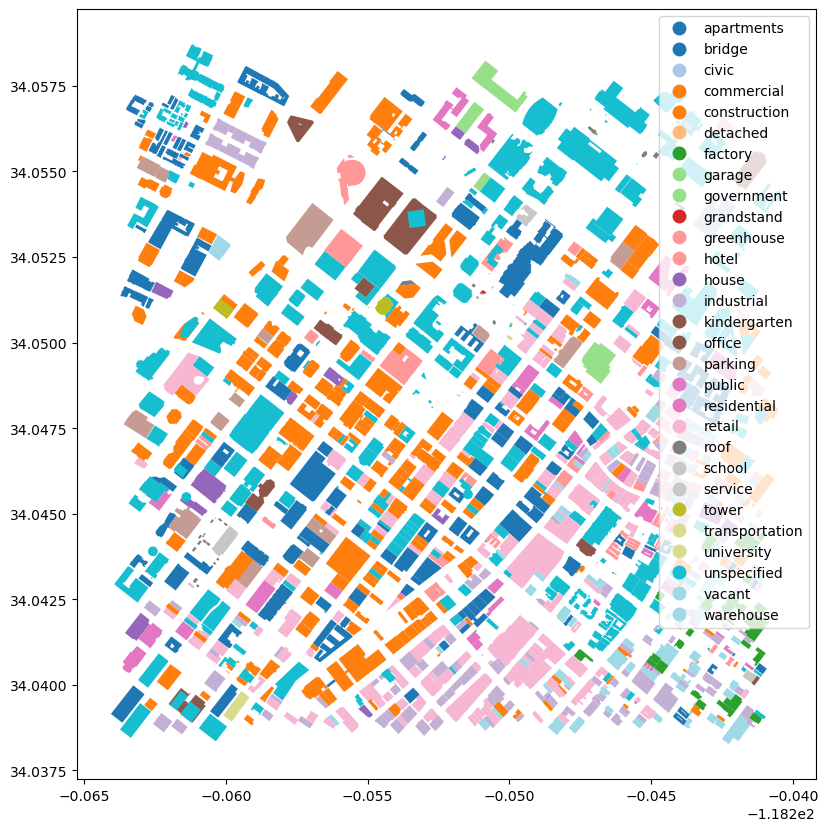

In [21]:
osm.plot(figsize=(10,10),
         column='building',
         cmap='tab20', # you can change color pallet by the reference above
         legend=True)

In [ ]:
# how to assign specific color to each category? Chris will send the code for it later!!

In [ ]:
# legend is overlap with map...how can we move it to the outside of the map?
## the way is on the link below

## Clean up: Add a title, move the legend, remove axis

### Move the legend

Moving the legend is surprisingly difficult to do. There are two key/value pairs that you need to pass using the `legend_kwds` argument. The `loc` and `bbox_to_anchor` values allow you to locate the legend outside the plot. Here is a good explanation of how that is done:

* https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot/43439132#43439132

### Add a title
Use `ax.set_title()` to add a title to the chart.

### Remove the axis

Turn off the axis with the `ax.axis('off')` statement.



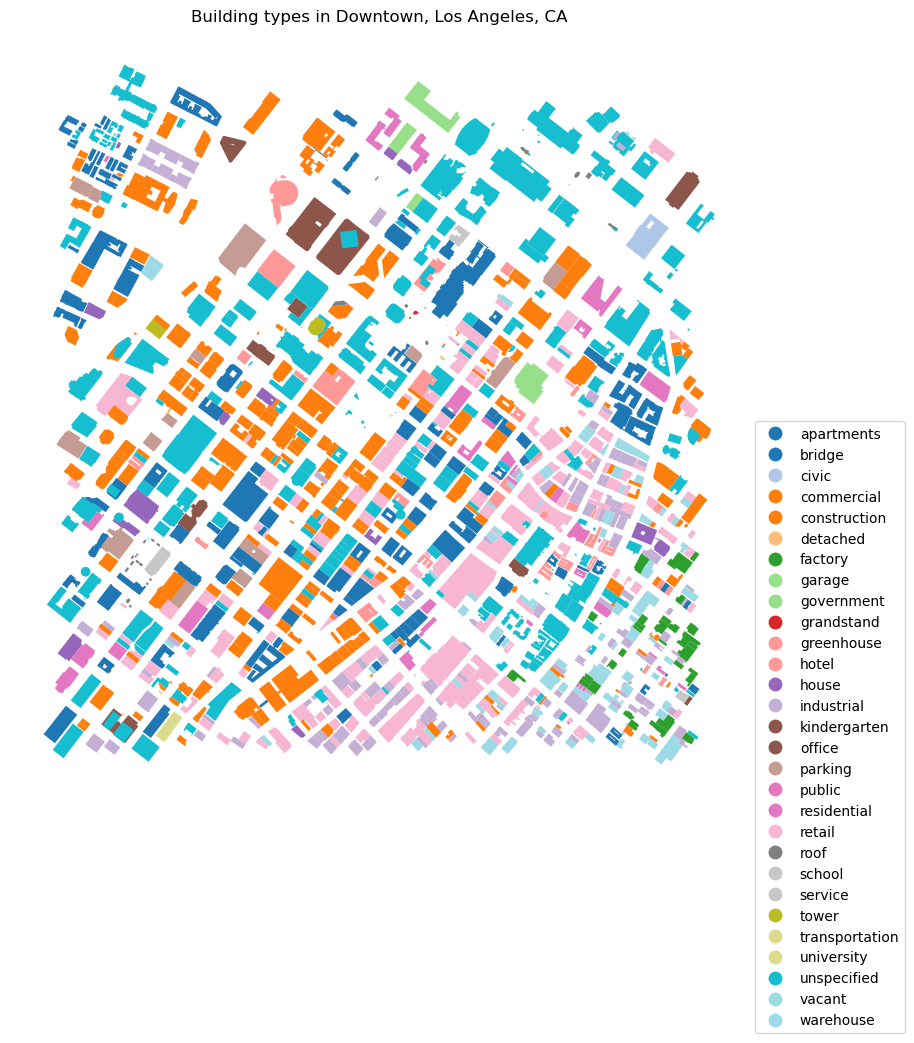

In [25]:
fig, ax = plt.subplots(figsize=(10,10))

# create the map plot
osm.plot(ax=ax,
         column='building',
         cmap='tab20',
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.5)}) 
# you can change the location of the legend box by changing the number above

# add a title
ax.set_title('Building types in ' + address)

# get rid of the axis
ax.axis('off');

### Taking it to the next level

Choropleth maps are created, and left to be... as-is. Ask yourself, will your audience be able to get the most out of your graphic? In fact, choropleth maps are all too often seen as a means to an end, when in fact, they are perhaps the biggest cartographic overuse. Instead, solicit your audience through the use of binary maps, which allow the eyes to more easily detect patterns, convey visual information with greater clarity, and are frankly,  aesthically engaging.

Consider that your graph is a two-dimensional map of an urban space that shows the relationship between what something is and what it is not, built and unbuilt spaces. Using a solid black infill for certain spaces and a light gray color for other spaces mimics a historically popular design approach known as the figure-ground diagram, popularized by urban artists from the 17th century. Consider the specter of Giambattista Nolli's plan of Rome in 1748:

<img src="images/Nolli 1748.jpeg">

In more modern times, figure-ground diagrams have been used to depict urban morphology, the study of the formation of human habitats and their transformation of urban form over time. Modern urbanists such as Geoff Boeing (author of the OSMNX library used in this session) have coined the term "data-driven urban morphology" by combining big data and computation to explore urban spaces through the modeling of spatial data. The sudden and open availability of OSM data for locations all over the world have enabled practitioners to visualize urban phenomena across cities.

<img src="images/urban morphology.jpg" width=600>

Image from "[Spatial information and the legibility of urban form: Big data in urban morphology](ttps://www.sciencedirect.com/science/article/pii/S0268401219302154)," Geoff Boeing, 2021. One square mile of each city’s street network and building footprints, comparing US cities to informal settlements in the Global South.

With just a few weeks under our belts as spatial data scientists, do we dare presume to generate similar graphics of interest? Let's give it a shot.

Goal: To create a series of maps, with each map highlighting a single building type as a figure-ground diagram.

### Step 1: Calculate the map bounds of your data

In order to make sure that each map has the same extent (bounds), assign the min/max x/y's using the `total_bounds` function ([documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.total_bounds.html)).

In [26]:
# get min/max bounds of lat/lon
minx = osm.total_bounds[0]
miny = osm.total_bounds[1]
maxx = osm.total_bounds[2]
maxy = osm.total_bounds[3]

### Step 2: Create a building type list

Use the `unique()` function to find distinct building types, and put it in a python list.

In [27]:
# get unique buiding types in a list
buildingtypes = osm['building'].unique().tolist()
buildingtypes

['unspecified',
 'tower',
 'apartments',
 'hotel',
 'office',
 'parking',
 'residential',
 'roof',
 'garage',
 'construction',
 'school',
 'grandstand',
 'service',
 'retail',
 'vacant',
 'industrial',
 'commercial',
 'warehouse',
 'public',
 'house',
 'factory',
 'greenhouse',
 'kindergarten',
 'transportation',
 'government',
 'university',
 'bridge',
 'detached',
 'civic']

### Step 3: Create a loop for each buidling type

Now that we have the list of building types, we can loop through each building type and create individual maps. 

**Beware** Loops are super powerful operations in any programming language. Make sure that what you ask is *reasonable* to the computational resources available.

/tmp/ipykernel_6397/414436900.py:3: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



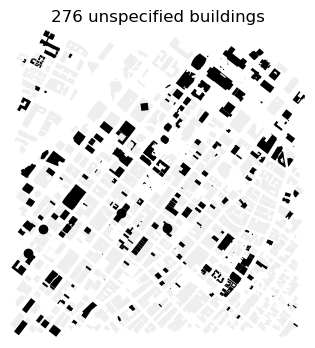

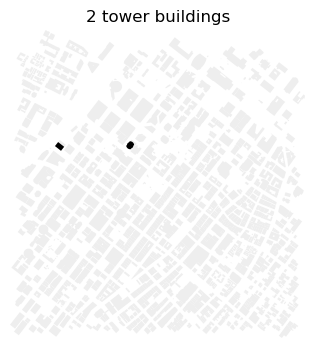

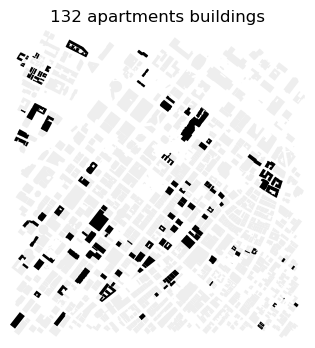

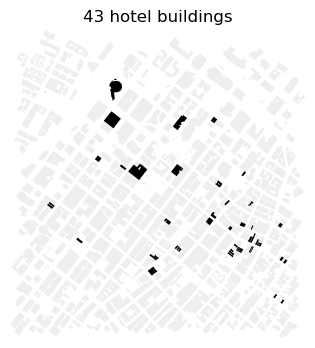

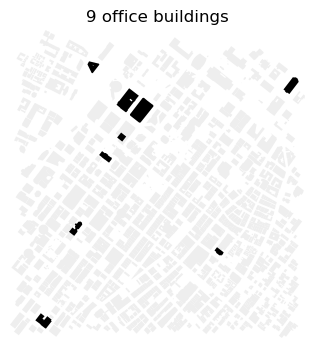

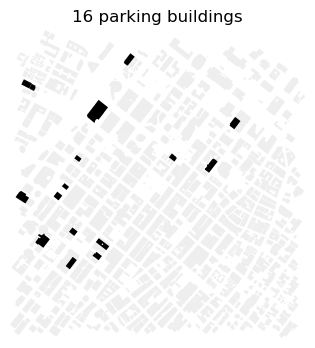

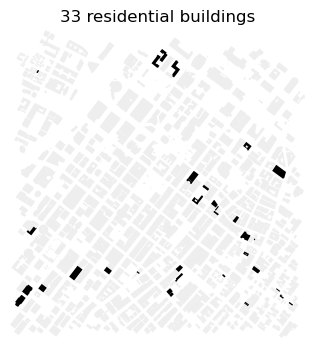

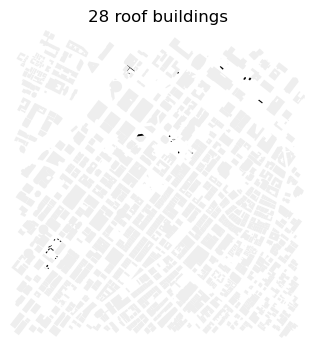

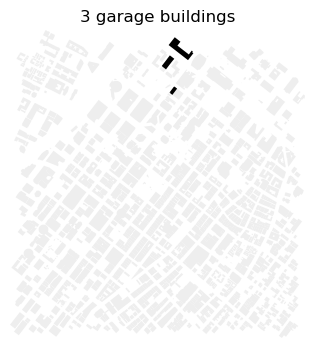

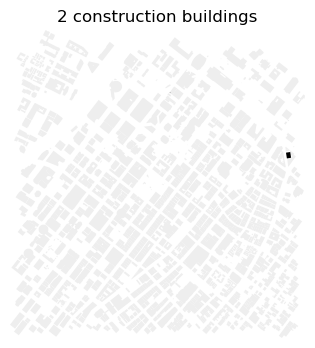

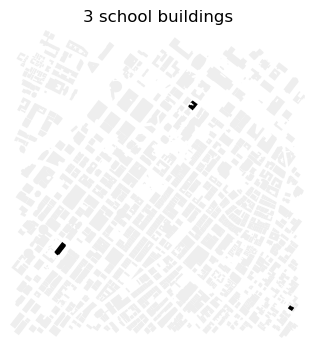

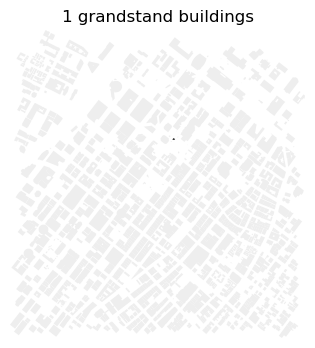

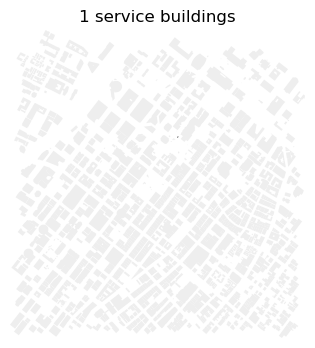

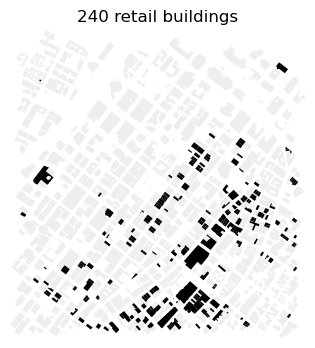

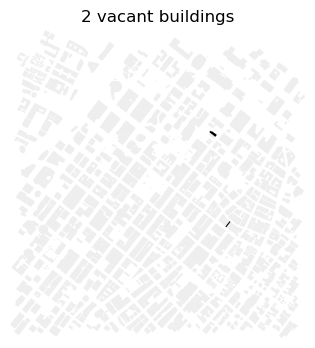

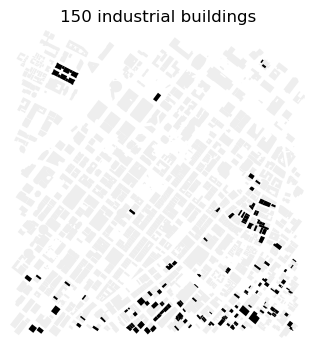

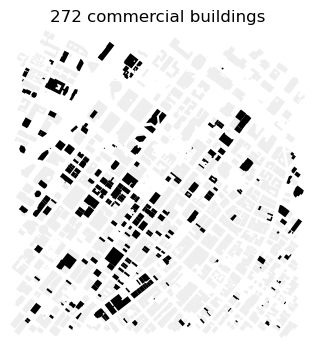

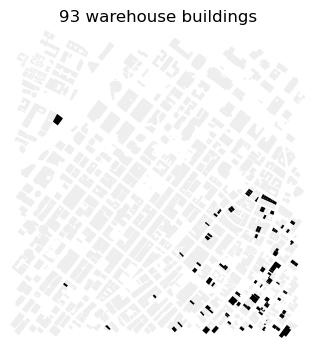

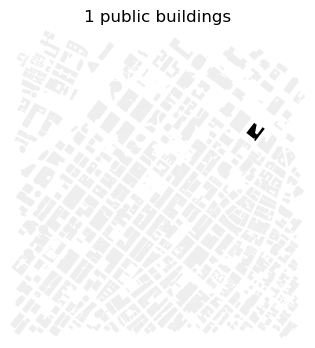

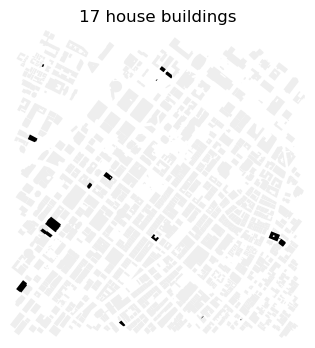

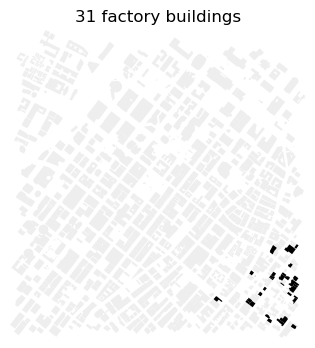

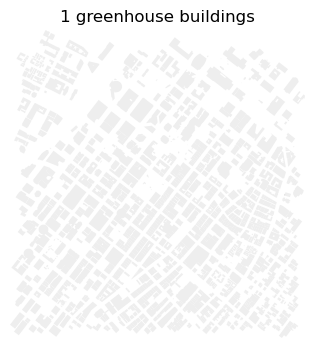

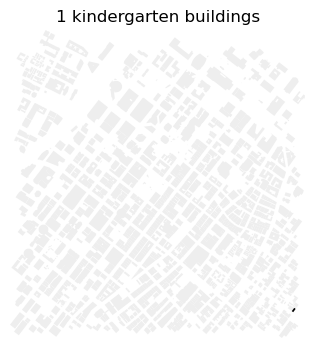

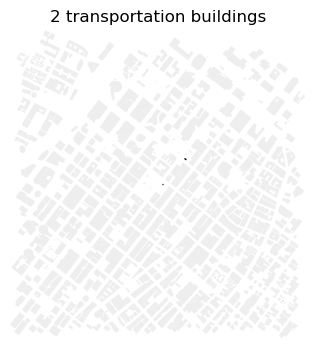

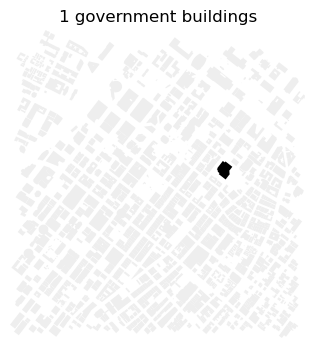

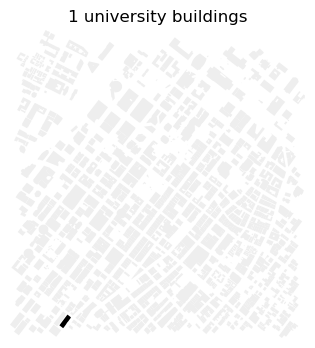

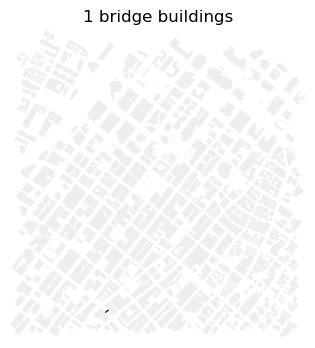

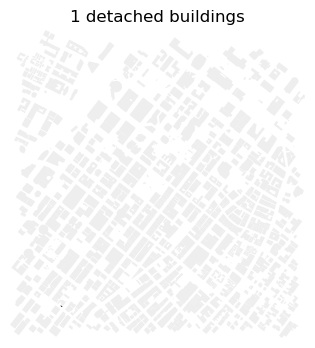

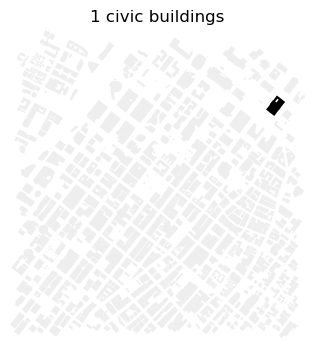

In [30]:
# loop through building types
for type in buildingtypes:
    fig, ax = plt.subplots(figsize=(4,4))
    # creating empty map

    # create the map plot
    osm.plot(ax=ax,
            # column='building',
            color='#eee')

    # create the map plot
    osm[osm['building'] == type].plot(ax=ax,
            # column='building',
            color='black')

    # set the extent of the map 
    # so that each map has the same bounds
    ax.set_xlim((minx,maxx))
    ax.set_ylim((miny,maxy))

    # add a title
    number_of_buildings = len(osm[osm['building']==type])
    ax.set_title(str(number_of_buildings) + ' ' + type + ' buildings')

    # get rid of the axis
    ax.axis('off');

## Add a basemap

Adding a basemap to a geopandas plot can be done using the contextily library. To do so, you must:

* reproject your geodataframe to Web Mercator (epsg: 3857)
* add a basemap, use the following guidelines: https://github.com/geopandas/contextily

In [32]:
# reproject to Web Mercator
osm_web_mercator = osm.to_crs(epsg=3857)
# epsg=3857 is a projection using meter scale, while epsg=45~ is using longitude scale 

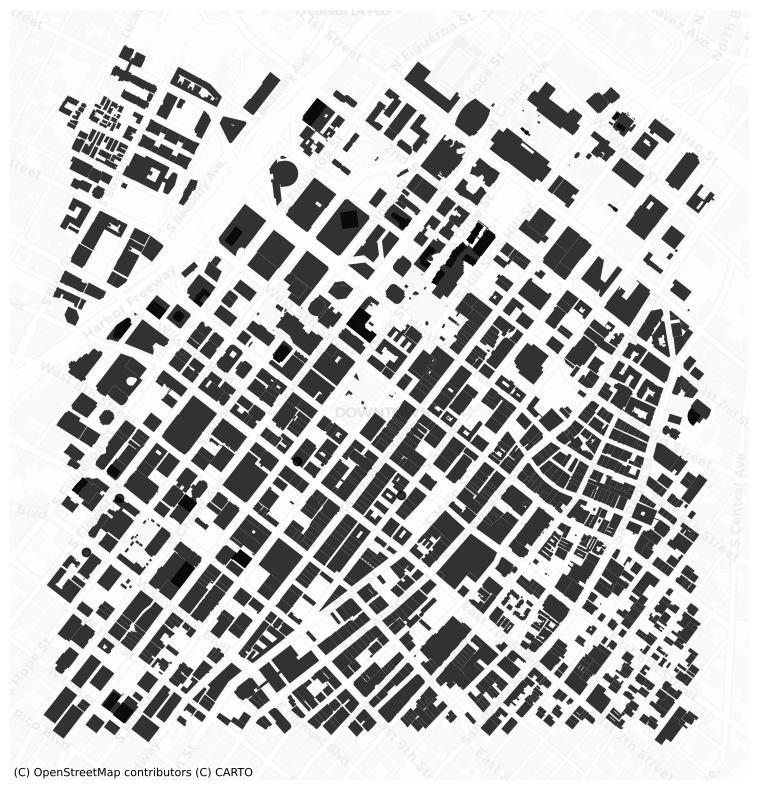

In [33]:
fig,ax = plt.subplots(figsize=(10,10))

osm_web_mercator.plot(ax=ax,
                    color="black",
                    alpha=0.8,
                    )

# get rid of the axis
ax.axis('off');

# basemap from carto that has a dark background (easier to see)
ctx.add_basemap(ax=ax,
                source=ctx.providers.CartoDB.Positron,
                alpha=0.3 # add transparency to make it less dominant (0.3 means 30% transparency)
                )

plt.savefig('dtla.png')

<div class="alert alert-info">

Create a map plot of building types for your place of interest.
    
Take a screengrab or save the resulting image with ```plt.savefig('city-name.png')```, and paste it into this <a href="https://docs.google.com/document/d/1cySh-_fXGkniGJXrztM-ZNtDETmTYunWp4ZbMCOEJ2s/edit?usp=sharing" target="_blank">Google Document</a>.
</div>

# Create a function

Whew! That was a lot of work to finally get our building map for a given location. But what if you wanted to repeat this process for *multiple* locations?

Welcome to the world of functions. According to [W3Schools](https://www.w3schools.com/python/python_functions.asp), a python function is:
* A function is a block of code which only runs when it is called.
* You can pass data, known as parameters, into a function.
* A function can return data as a result.

In other words, you create a function (a block of code that does something), and it remains dormant until you call on it. For this lab, let's create a function that creates a building map based on location data that you pass into it.

In [1]:
# let's make this function together
def your_name():    
    print('My name is Ashkay')

In [2]:
# call it
your_name()

My name is Ashkay


In [3]:
# modify the function to accept arguments
def your_name(name):
    print('My name is ' + name)

In [4]:
# call it
your_name()

TypeError: your_name() missing 1 required positional argument: 'name'

In [43]:
# call it correctly
your_name('Carolyn')

# or (does the same thing)
your_name(name='Carolyn')

My name is Carolyn
My name is Carolyn


In [45]:
# add additional parameters
def your_name(firstname, lastname):
    print('My name is ' + firstname + ' ' + lastname)

In [46]:
your_name('Erik','Felix')

My name is Erik Felix


In [47]:
# provide default values
def your_name(firstname = 'Michael', lastname = 'Jordan'):
    print('My name is ' + firstname + ' ' + lastname)

In [48]:
# call it with no arguments
your_name()

My name is Michael Jordan


In [49]:
# call it with one argument
your_name(firstname = 'Emma')

My name is Emma Jordan


In [52]:
# you can also do computations
def f_to_c(f):
    c = (f-32)*5/9 
    return c

In [53]:
f_to_c(80)

26.666666666666668

## Create a function that generates a map based on any location

### The anatomy of the function

<img src="images/function.png">

In [54]:
# function to create a map using open street map
def make_building_map(location):
 
    # get the data from osm
    osm = ox.features.features_from_address(location,
                                     tags={'building':True},
                                     dist=500)
    
    # create the figure as a subplot
    fig,ax = plt.subplots(figsize=(6,6))
    
    # add the map
    osm.plot(ax=ax,
                        color="black",
                        alpha=0.8,
                        )

    # add a title
    ax.set_title(location)

    # get rid of the axis
    ax.axis('off')    

CPU times: user 1.61 s, sys: 57 ms, total: 1.67 s
Wall time: 5.63 s


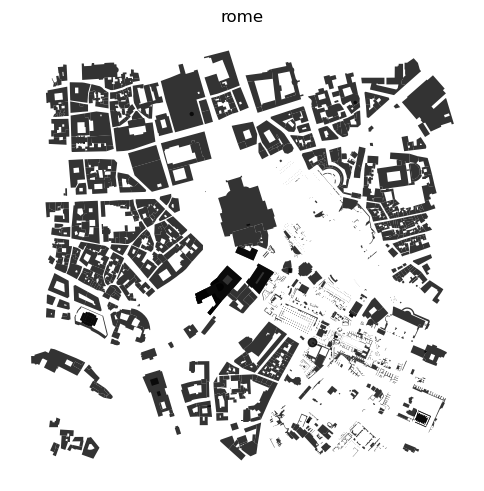

In [55]:
%%time 
# a "magic" function to display the time it took to run this cell
# run the function once
make_building_map('rome')

# Looping through it

To make the use of functions even more effective, let's create a list of addresses.

In [56]:
address_list = ['downtown los angeles','new york','kyoto','monrovia','paris','new delhi']

CPU times: user 5.15 s, sys: 213 ms, total: 5.36 s
Wall time: 27.4 s


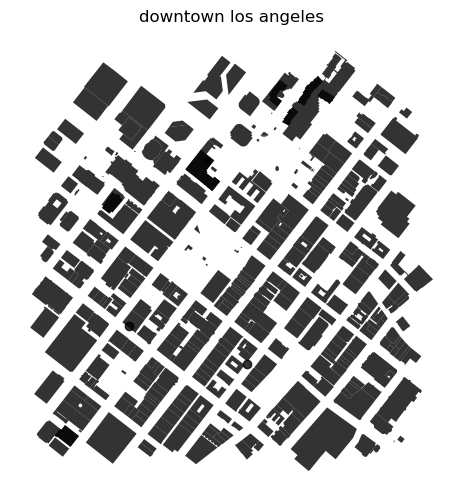

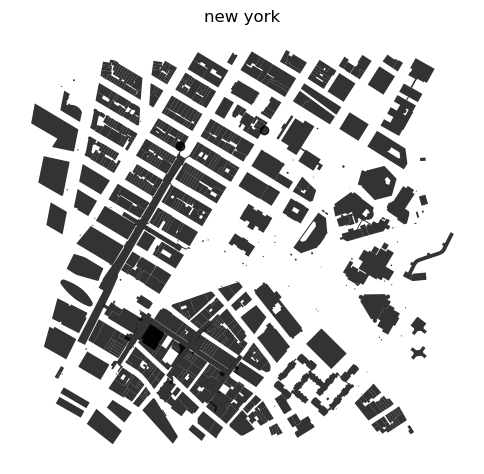

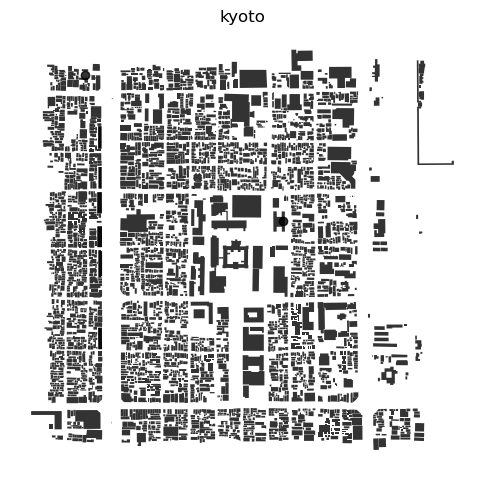

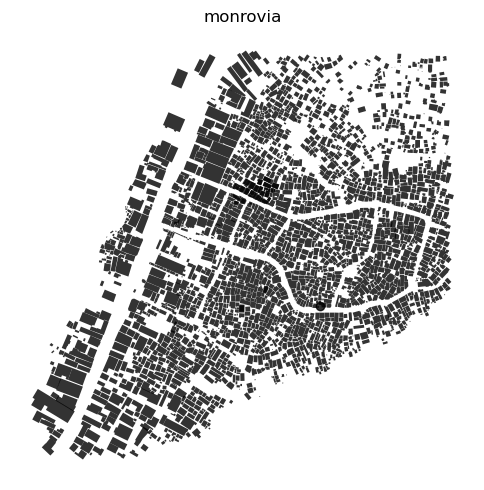

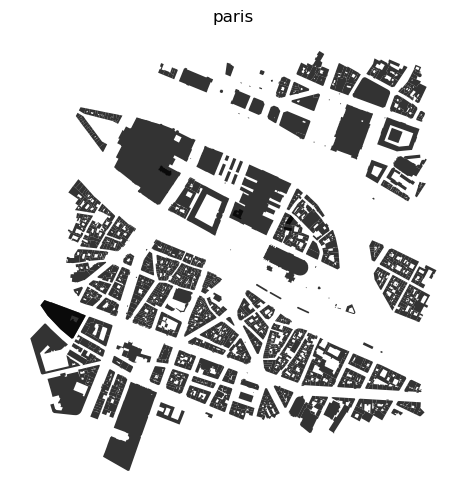

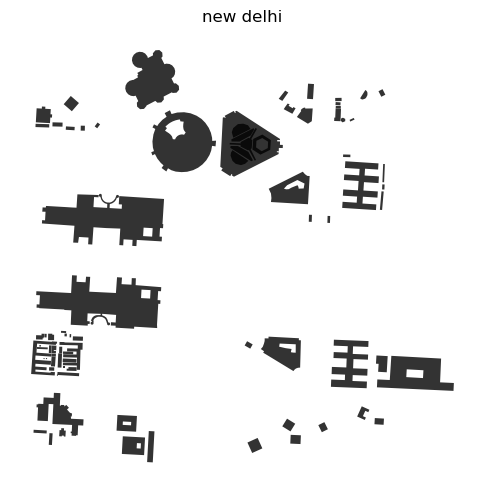

In [57]:
%%time
# run our function for every address in our list
for address in address_list:
    make_building_map(address)

# you can also create maps centered on a designated point by using different code
# (if you use the code above, it will automatically pick up a selected point in each city)

# Doing other searches

For this lab, we used the tags argument: `'building':True`. This indicates a desire to download *all* buildings for the given geography. There are many other options to filter what you download from OSM. 

* https://wiki.openstreetmap.org/wiki/Map_Features

Examples calls to intake features from OSM:

```python
# for all buildings (could be a very large query)
features = ox.geometries_from_address(place, tags={'building': True})

# for specific buildings
features = ox.geometries_from_address(place, tags={'building': ['retail','industrial','commercial']})

# for amenities
features = ox.geometries_from_address(place, tags={'amenity': ['restaurant','fast_food']})

# for leisure spaces
features = ox.geometries_from_address(place, tags={'leisure': ['park']})
```

Note that when you perform a different search based on a different type of tag, **you may not get the same columns back**. You will need to adjust the code in this lab to reflect the columns that are returned. For example, a tag for "leisure" may not return "buildings", and instead, you may want to color code the map by the column "leisure."